In [7]:
import nibabel as nib
import matplotlib.pyplot as plt
import configparser
import pandas as pd

In [11]:
patient_cfg = configparser.ConfigParser()

data = pd.DataFrame(columns=['Group', 'Height', 'Weight', 'BMI', 'NbFrame', 'ED', 'ES'])

for i in range(100):
    idx = str(i+1).zfill(3)
    patient_cfg.read_string('[Info]\n' + open('./data/training/patient' + idx + '/info.cfg').read())

    ed = patient_cfg.get('Info', 'ED')
    es = patient_cfg.get('Info', 'ES')
    group = patient_cfg.get('Info', 'Group')
    nbFrame = patient_cfg.get('Info', 'NbFrame')
    height = float(patient_cfg.get('Info', 'Height'))
    weight = float(patient_cfg.get('Info', 'Weight'))
    bmi = weight / (height / 100) ** 2
    
    """
    TODO add BMI category
    If your BMI is less than 18.5, it falls within the underweight range.
    If your BMI is 18.5 to <25, it falls within the healthy weight range.
    If your BMI is 25.0 to <30, it falls within the overweight range.
    If your BMI is 30.0 or higher, it falls within the obesity range.
    """

    data.loc[i] = [group, height, weight, bmi, nbFrame, ed, es]

In [ ]:
image_data = img.get_fdata()
patient_cfg.read_string('[Info]\n' + open('./data/training/patient' + idx + '/info.cfg').read())

In [12]:
data

,Group,Height,Weight,BMI,NbFrame,ED,ES
0,DCM,184.0,95.0,28.060019,30,1,12
1,DCM,160.0,70.0,27.343750,30,1,12
2,DCM,165.0,77.0,28.282828,30,1,15
3,DCM,159.0,46.0,18.195483,28,1,15
4,DCM,165.0,77.0,28.282828,30,1,13
...,...,...,...,...,...,...,...
95,RV,186.0,76.0,21.967858,15,1,8
96,RV,187.0,82.0,23.449341,30,1,11
97,RV,167.0,50.0,17.928215,22,1,9
98,RV,180.0,80.0,24.691358,19,1,9


In [13]:
# export to csv
data.to_csv('./patients_info.csv', index=False)

In [5]:
# read csv file
data = pd.read_csv('./patients_info.csv')
data

,ED,ES,Group,NbFrame,Height,Weight
0,1,12,DCM,30,184.0,95.0
1,1,12,DCM,30,160.0,70.0
2,1,15,DCM,30,165.0,77.0
3,1,15,DCM,28,159.0,46.0
4,1,13,DCM,30,165.0,77.0
...,...,...,...,...,...,...
95,1,8,RV,15,186.0,76.0
96,1,11,RV,30,187.0,82.0
97,1,9,RV,22,167.0,50.0
98,1,9,RV,19,180.0,80.0


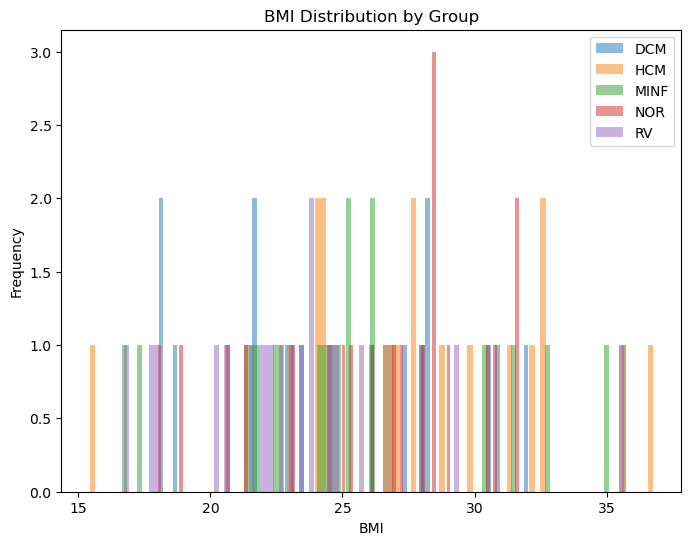

In [19]:
# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate through groups and plot BMI distributions on the same axes
for group in data['Group'].unique():
    group_data = data[data['Group'] == group]['BMI']
    ax.hist(group_data, bins=100, alpha=0.5, label=group)

# Add labels and a legend
ax.set_title('BMI Distribution by Group')
ax.set_xlabel('BMI')
ax.set_ylabel('Frequency')
ax.legend()

# Show the plot
plt.show()

In [20]:
"""
plot for each group the BMI distribution and color them according to the following color code:
or the BMI, there are are categories: Underweight, healthy, overweight and obesity, can you do a plot with these categories as well?
If your BMI is less than 18.5, it falls within the underweight range.
If your BMI is 18.5 to <25, it falls within the healthy weight range.
If your BMI is 25.0 to <30, it falls within the overweight range.
If your BMI is 30.0 or higher, it falls within the obesity range.
"""

data['BMI_category'] = pd.cut(data['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Healthy', 'Overweight', 'Obesity'])
data

,Group,Height,Weight,BMI,NbFrame,ED,ES,BMI_category
0,DCM,184.0,95.0,28.060019,30,1,12,Overweight
1,DCM,160.0,70.0,27.343750,30,1,12,Overweight
2,DCM,165.0,77.0,28.282828,30,1,15,Overweight
3,DCM,159.0,46.0,18.195483,28,1,15,Underweight
4,DCM,165.0,77.0,28.282828,30,1,13,Overweight
...,...,...,...,...,...,...,...,...
95,RV,186.0,76.0,21.967858,15,1,8,Healthy
96,RV,187.0,82.0,23.449341,30,1,11,Healthy
97,RV,167.0,50.0,17.928215,22,1,9,Underweight
98,RV,180.0,80.0,24.691358,19,1,9,Healthy


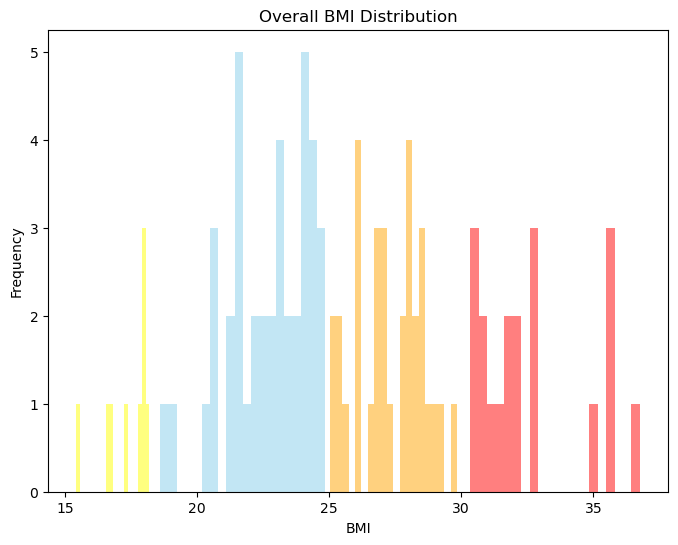

In [24]:
#plot bmi distribution for each bmi category when group is 'DCM'

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a histogram of the overall BMI distribution
color_map = {
    'Underweight': 'yellow',
    'Healthy': 'skyblue',
    'Overweight': 'orange',
    'Obesity': 'red'
}

for category, color in color_map.items():
    category_data = data[data['BMI_category'] == category]['BMI']
    ax.hist(category_data, bins=20, alpha=0.5, color=color, label=category)

# Add labels and a title
ax.set_title('Overall BMI Distribution')
ax.set_xlabel('BMI')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

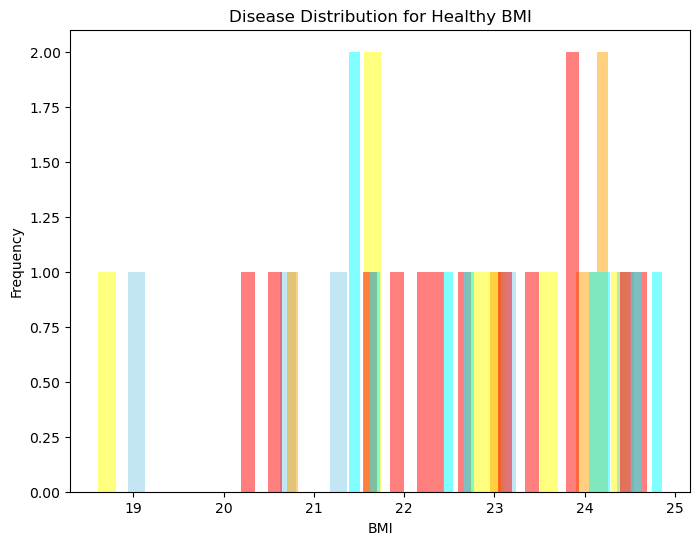

In [34]:


#plot bmi distribution for each bmi category when group is 'DCM'

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a histogram of the overall BMI distribution
color_map = {
    'DCM': 'yellow',
    'NOR': 'skyblue',
    'HCM': 'orange',
    'RV': 'red',
    'MINF': 'cyan'
}

for category, color in color_map.items():
    category_data = data[(data['BMI_category'] == 'Healthy') & (data['Group'] == category)]['BMI']
    ax.hist(category_data, bins=30, alpha=0.5, color=color, label=category)

# Add labels and a title
ax.set_title('Disease Distribution for Healthy BMI')
ax.set_xlabel('BMI')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

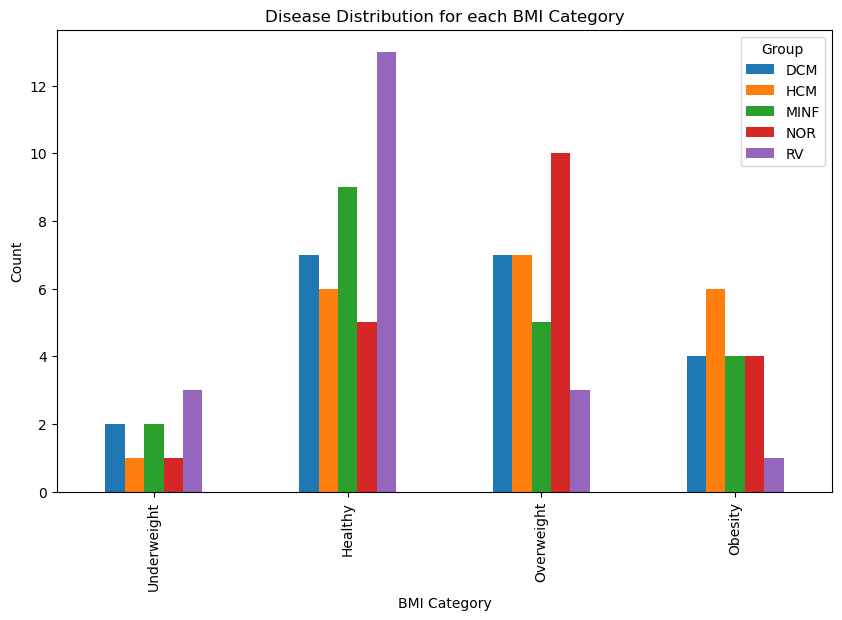

In [38]:
# Count the occurrences of each group for each BMI category
group_counts = data.groupby(['BMI_category', 'Group']).size().unstack(fill_value=0)

# Create a bar plot to visualize the counts
color_map = {
    'DCM': 'yellow',
    'NOR': 'skyblue',
    'HCM': 'orange',
    'RV': 'red',
    'MINF': 'cyan'
}
ax = group_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add labels and a title
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Disease Distribution for each BMI Category')

# Show the plot
plt.legend(title='Group')
plt.show()


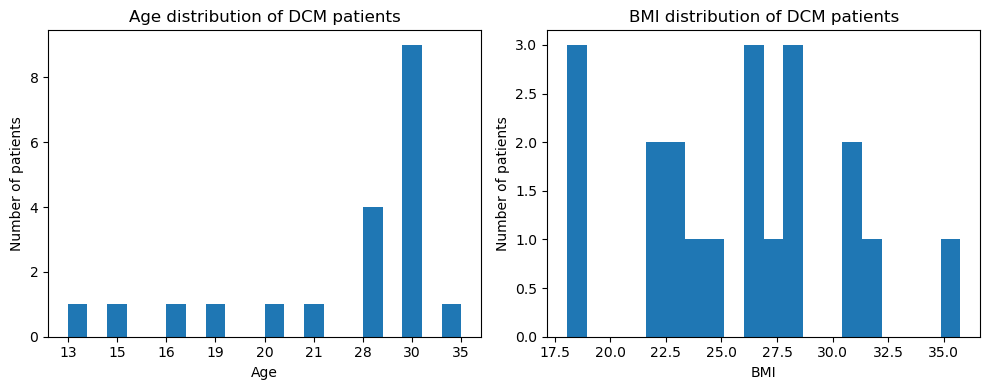

In [36]:
dcm = data[data['Group'] == 'DCM']
dcm_age = dcm['NbFrame'].sort_values()
dcm_bmi = dcm['Weight'].astype(float) / (dcm['Height'].astype(float) / 100) ** 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(dcm_age, bins=20)
ax1.set_title('Age distribution of DCM patients')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of patients')

ax2.hist(dcm_bmi, bins=20)
ax2.set_title('BMI distribution of DCM patients')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Number of patients')

plt.tight_layout()
plt.show()

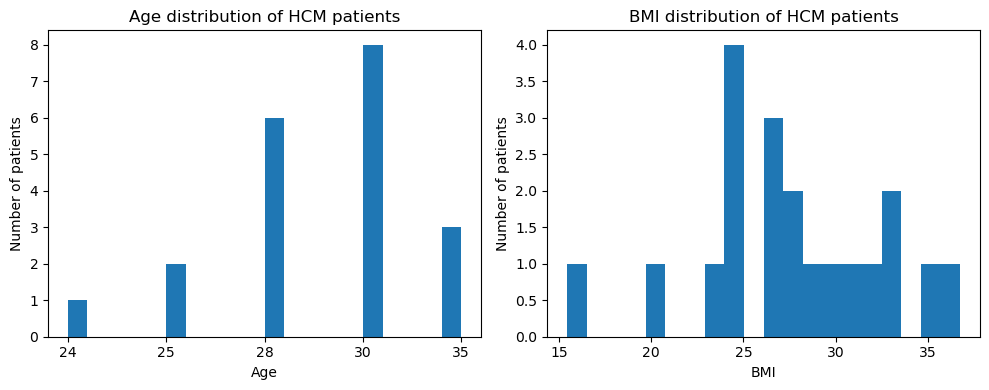

In [37]:
dcm = data[data['Group'] == 'HCM']
dcm_age = dcm['NbFrame'].sort_values()
dcm_bmi = dcm['Weight'].astype(float) / (dcm['Height'].astype(float) / 100) ** 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(dcm_age, bins=20)
ax1.set_title('Age distribution of HCM patients')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of patients')

ax2.hist(dcm_bmi, bins=20)
ax2.set_title('BMI distribution of HCM patients')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Number of patients')

plt.tight_layout()
plt.show()

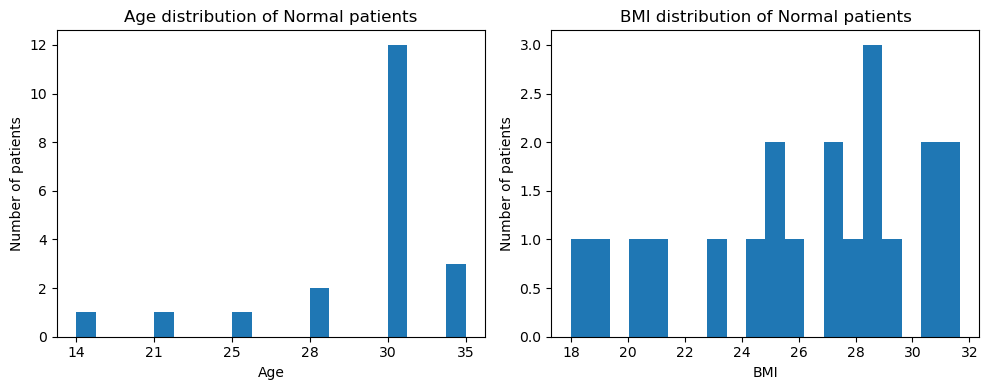

In [38]:
dcm = data[data['Group'] == 'NOR']
dcm_age = dcm['NbFrame'].sort_values()
dcm_bmi = dcm['Weight'].astype(float) / (dcm['Height'].astype(float) / 100) ** 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(dcm_age, bins=20)
ax1.set_title('Age distribution of Normal patients')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of patients')

ax2.hist(dcm_bmi, bins=20)
ax2.set_title('BMI distribution of Normal patients')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Number of patients')

plt.tight_layout()
plt.show()

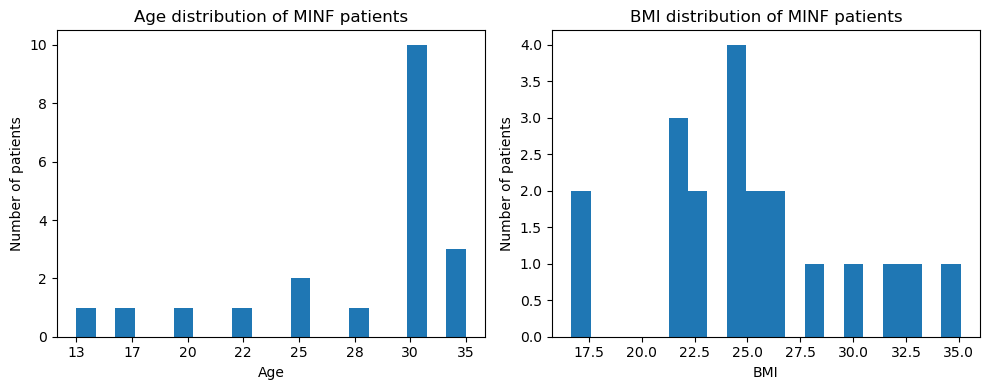

In [39]:
dcm = data[data['Group'] == 'MINF']
dcm_age = dcm['NbFrame'].sort_values()
dcm_bmi = dcm['Weight'].astype(float) / (dcm['Height'].astype(float) / 100) ** 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(dcm_age, bins=20)
ax1.set_title('Age distribution of MINF patients')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of patients')

ax2.hist(dcm_bmi, bins=20)
ax2.set_title('BMI distribution of MINF patients')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Number of patients')

plt.tight_layout()
plt.show()

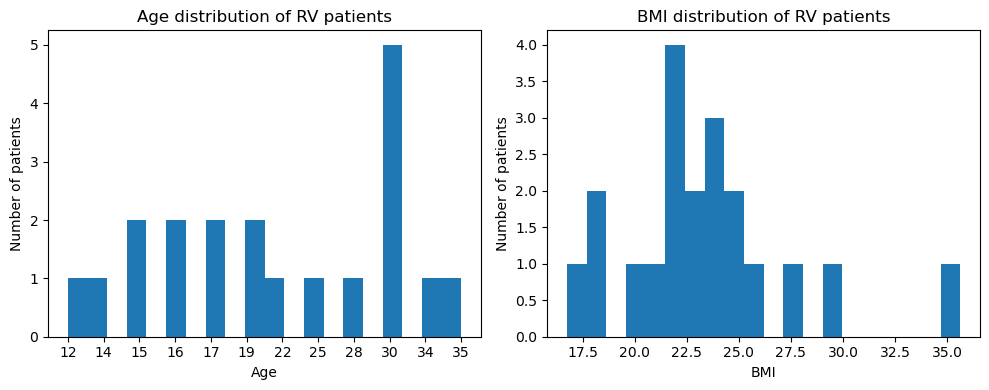

In [40]:
dcm = data[data['Group'] == 'RV']
dcm_age = dcm['NbFrame'].sort_values()
dcm_bmi = dcm['Weight'].astype(float) / (dcm['Height'].astype(float) / 100) ** 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(dcm_age, bins=20)
ax1.set_title('Age distribution of RV patients')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of patients')

ax2.hist(dcm_bmi, bins=20)
ax2.set_title('BMI distribution of RV patients')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Number of patients')

plt.tight_layout()
plt.show()

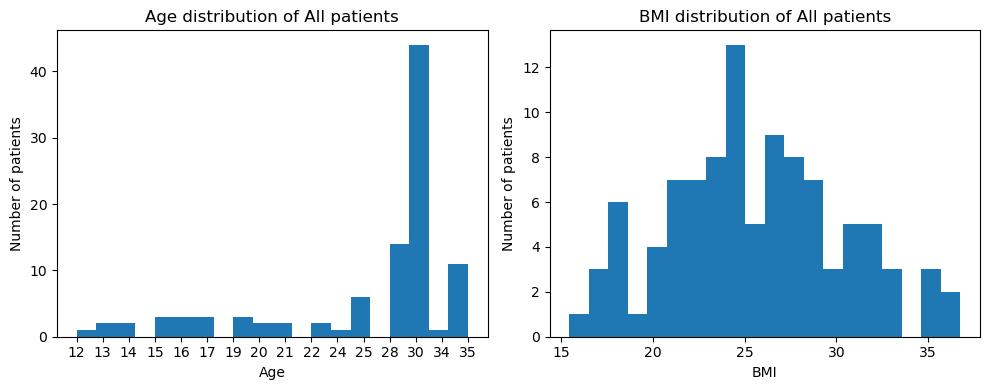

In [4]:
dcm_age = data['NbFrame'].sort_values()
dcm_bmi = data['Weight'].astype(float) / (data['Height'].astype(float) / 100) ** 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(dcm_age, bins=20)
ax1.set_title('Age distribution of All patients')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of patients')

ax2.hist(dcm_bmi, bins=20)
ax2.set_title('BMI distribution of All patients')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Number of patients')

plt.tight_layout()
plt.show()